In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import sklearn
import graphviz 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, precision_score
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.datasets import make_classification

#### Decision Tree Overfitting 

#### Create Sample Data 

In [17]:
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=121)

print(X_features.shape)
print(y_labels.shape)

(100, 2)
(100,)


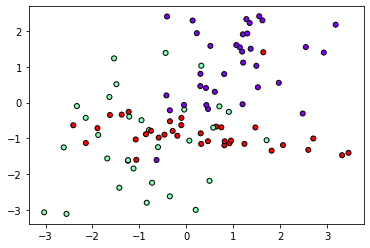

In [18]:

plt.scatter(X_features[:, 0], X_features[:, 1], marker="o", c=y_labels, s=25, cmap="rainbow", edgecolors="k")

In [22]:
import numpy as np

def set_visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [25]:
dt_clf = DecisionTreeClassifier(random_state=121).fit(X_features, y_labels)

C:\Users\lio22\AppData\Local\Temp\ipykernel_1712\3611988881.py:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


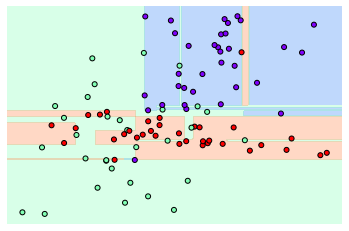

In [26]:

set_visualize_boundary(dt_clf, X_features, y_labels)

C:\Users\lio22\AppData\Local\Temp\ipykernel_1712\3611988881.py:18: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


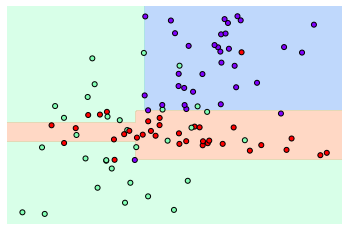

In [32]:
dt_clf = DecisionTreeClassifier(random_state=121, min_samples_leaf=6).fit(X_features, y_labels)
set_visualize_boundary(dt_clf, X_features, y_labels)